# Linear Regression

## Introduction

Linear regression is one of the most fundamental algorithms in machine learning. It models the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data.

The general form of a linear regression model is:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon$$

Where:
- $y$ is the target variable
- $x_i$ are the feature variables
- $\beta_0$ is the intercept
- $\beta_i$ are the coefficients
- $\epsilon$ is the error term

Linear regression tries to find the best values for $\beta_0$ and $\beta_i$ that minimize the sum of squared errors (SSE) between the predicted values and the actual values.

In this notebook, we'll explore linear regression using the Boston Housing dataset, which is a classic regression problem.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
import joblib
import warnings

# Set up visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
warnings.filterwarnings('ignore')
sns.set_palette('Set2')

# Set random seed for reproducibility
np.random.seed(42)

## 1. Data Loading and Exploration

Let's load the California Housing dataset and explore its structure.

In [2]:
# Load the California Housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# Display information about the dataset
print(f"Dataset shape: {X.shape}")
print(f"Feature names: {housing.feature_names}")
print(f"Target: {housing.target_names}")
print("\nFeature Descriptions:")
print(housing.DESCR[:1000] + "...")

Dataset shape: (20640, 8)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: ['MedHouseVal']

Feature Descriptions:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target varia

In [3]:
# Create a DataFrame with both features and target for easier exploration
df = X.copy()
df['MEDV'] = y

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Get statistical summary of the dataset
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
# Check for missing values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64

## 2. Exploratory Data Analysis (EDA)

Let's visualize the data to understand the relationships between features and the target variable.

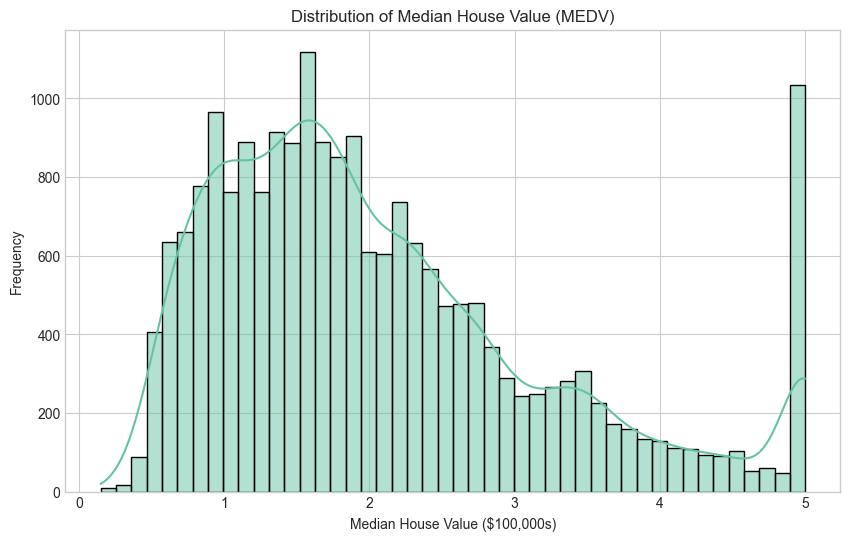

In [6]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['MEDV'], kde=True)
plt.title('Distribution of Median House Value (MEDV)')
plt.xlabel('Median House Value ($100,000s)')
plt.ylabel('Frequency')
plt.show()

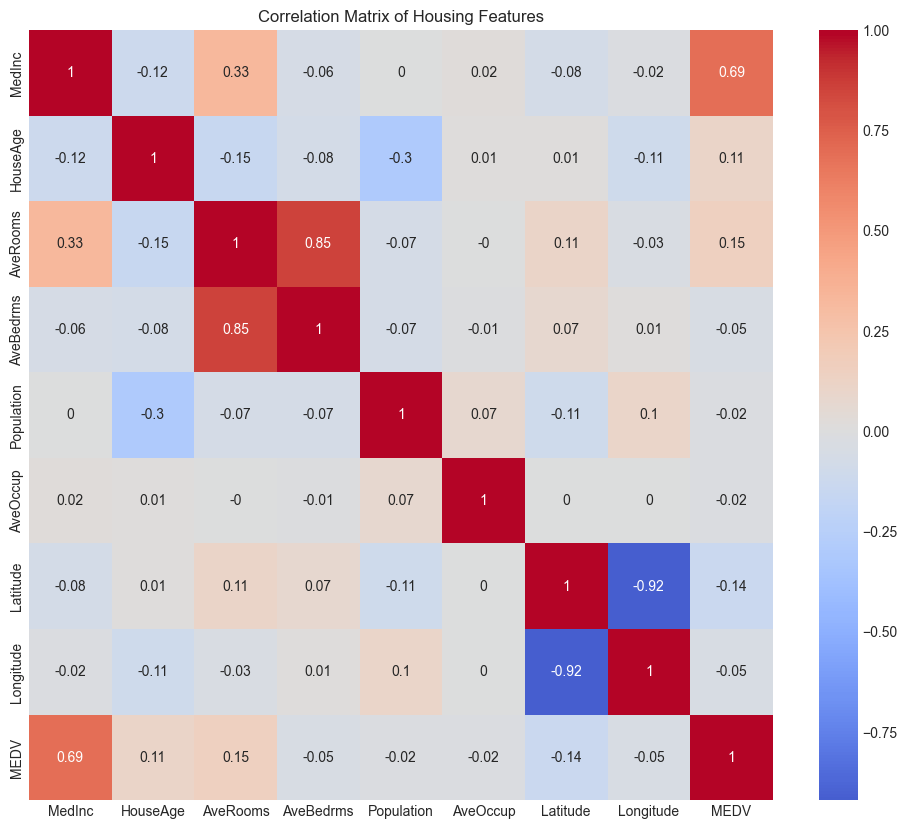

In [7]:
# Correlation matrix and heatmap
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Housing Features')
plt.show()

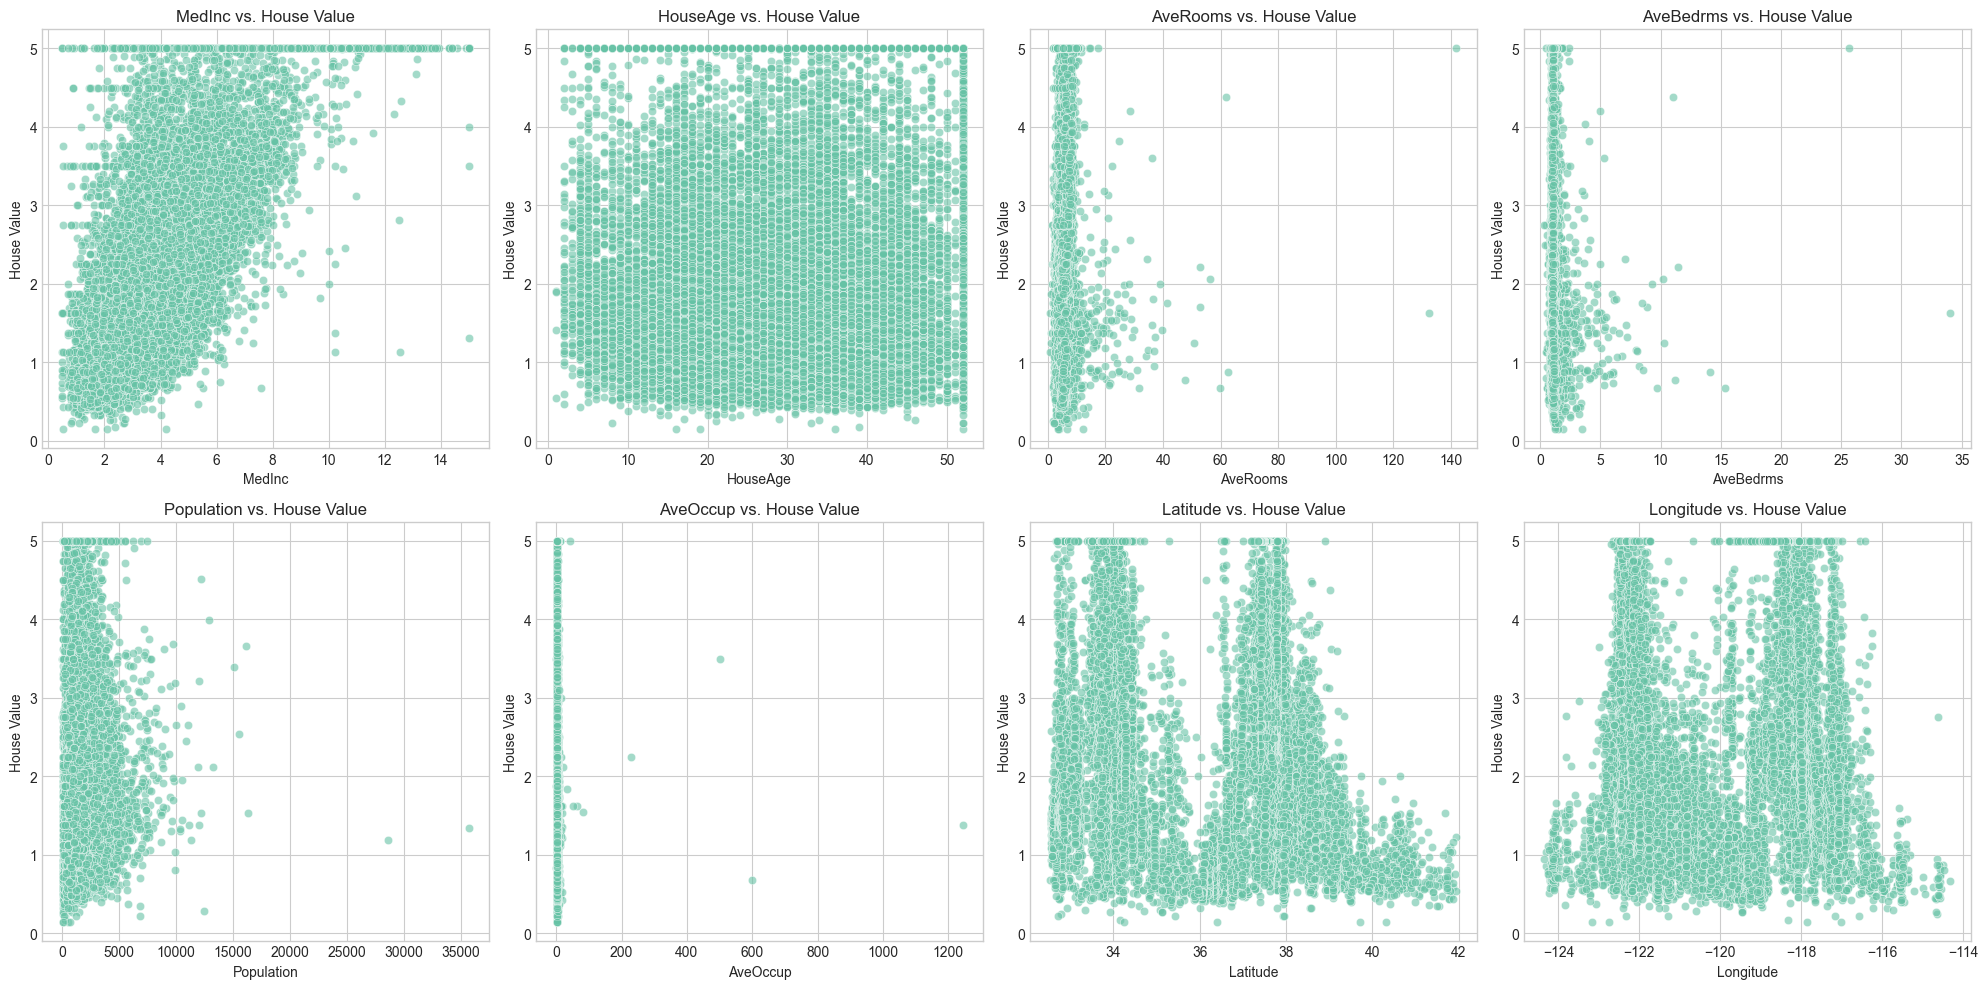

In [8]:
# Scatter plots of some important features vs. target
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(X.columns):
    sns.scatterplot(x=X[feature], y=y, alpha=0.6, ax=axes[i])
    axes[i].set_title(f'{feature} vs. House Value')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('House Value')
    
plt.tight_layout()
plt.show()

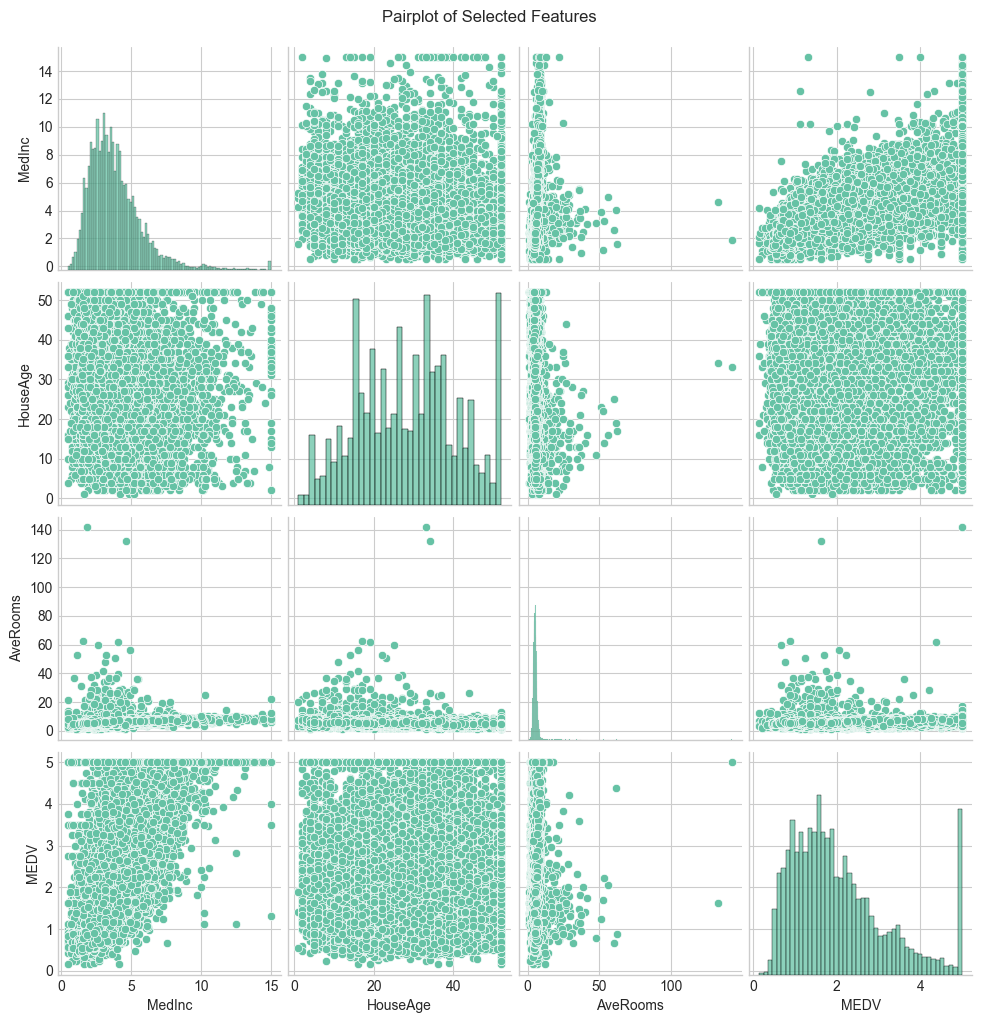

In [9]:
# Pairplot for selected features
sns.pairplot(df[['MedInc', 'HouseAge', 'AveRooms', 'MEDV']], height=2.5)
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

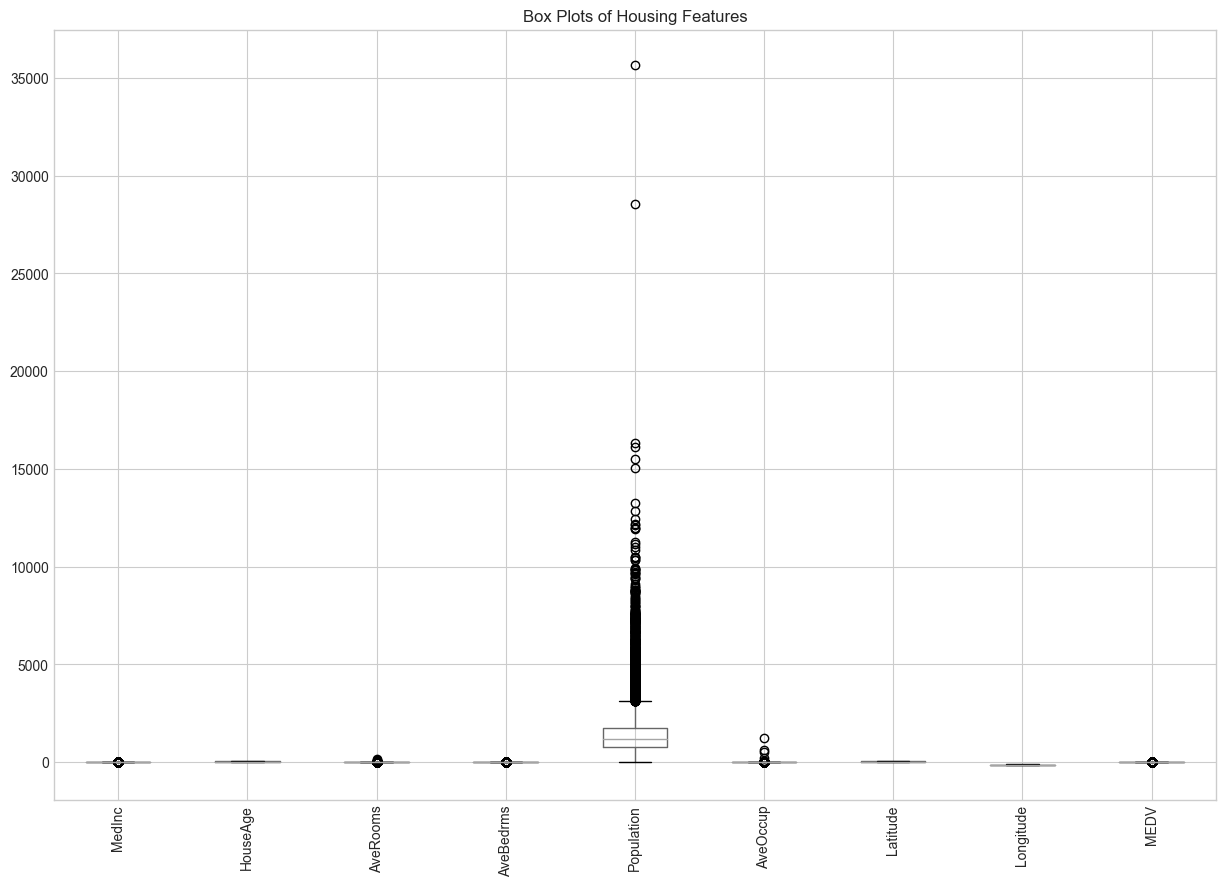

In [10]:
# Box plots to check for outliers
plt.figure(figsize=(15, 10))
df.boxplot()
plt.title('Box Plots of Housing Features')
plt.xticks(rotation=90)
plt.show()

## 3. Data Preprocessing

Let's prepare the data for model training by splitting it into training and testing sets, and scaling the features.

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (16512, 8)
Testing set shape: (4128, 8)


In [12]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames for better interpretability
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Scaled training data (first 5 rows):")
X_train_scaled_df.head()

Scaled training data (first 5 rows):


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.326196,0.348490,-0.174916,-0.208365,0.768276,0.051376,-1.372811,1.272587
1,-0.035843,1.618118,-0.402835,-0.128530,-0.098901,-0.117362,-0.876696,0.709162
2,0.144701,-1.952710,0.088216,-0.257538,-0.449818,-0.032280,-0.460146,-0.447603
3,-1.017864,0.586545,-0.600015,-0.145156,-0.007434,0.077507,-1.382172,1.232698
4,-0.171488,1.142008,0.349007,0.086624,-0.485877,-0.068832,0.532084,-0.108551


## 4. Model Building: Simple Linear Regression

Let's start with a basic linear regression model.

In [13]:
# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")
print(f"Training MAE: {train_mae:.4f}")
print(f"Testing MAE: {test_mae:.4f}")

Training MSE: 0.5179
Testing MSE: 0.5559
Training R²: 0.6126
Testing R²: 0.5758
Training MAE: 0.5286
Testing MAE: 0.5332


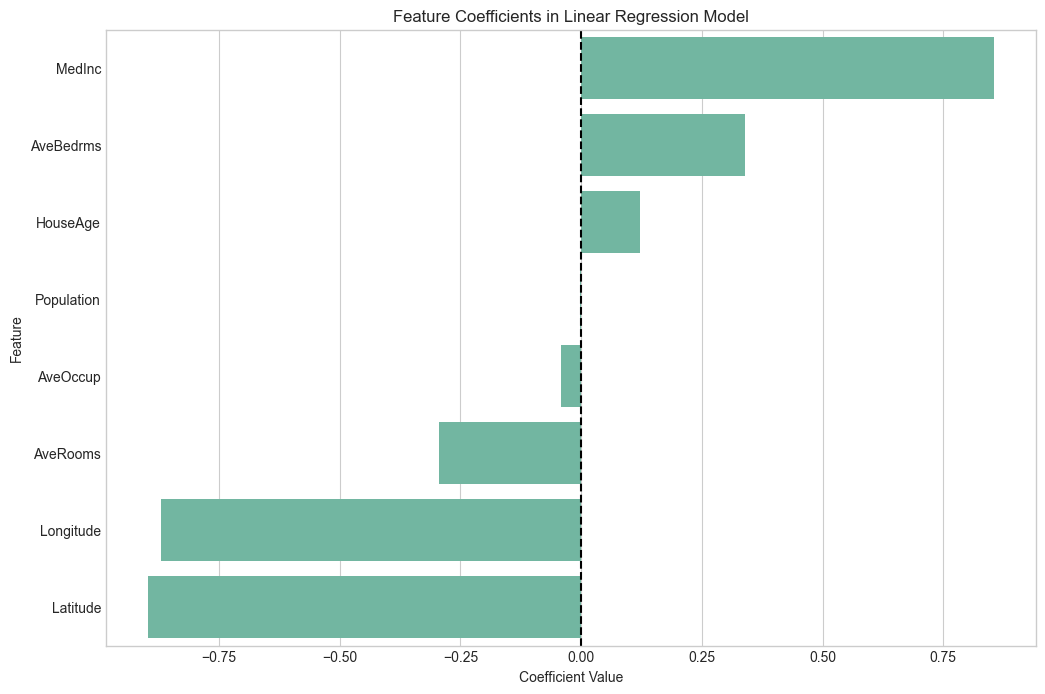

Intercept: 2.0719


In [14]:
# Visualize the model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Coefficients in Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(x=0, color='black', linestyle='--')
plt.show()

print(f"Intercept: {lr_model.intercept_:.4f}")

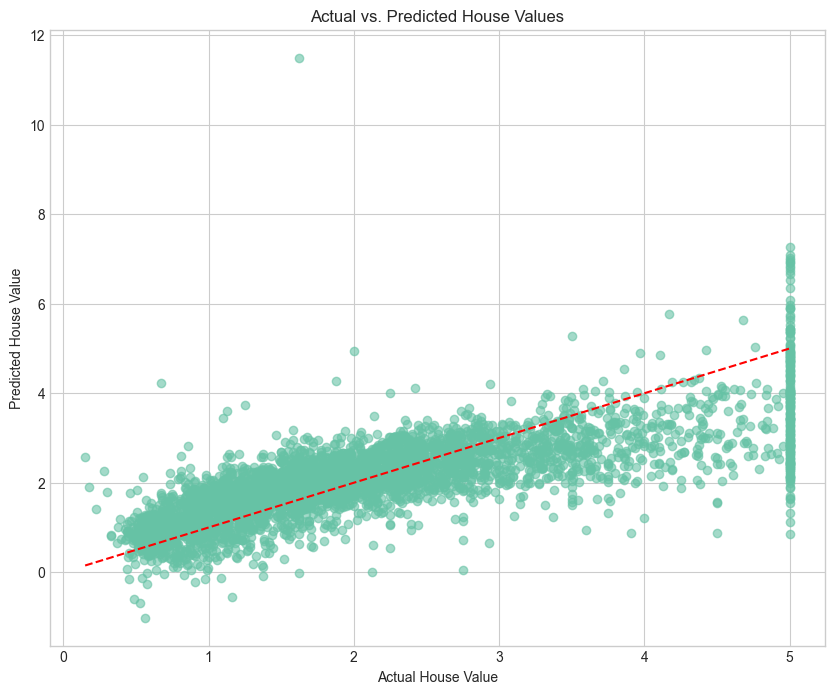

In [15]:
# Visualize actual vs. predicted values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.title('Actual vs. Predicted House Values')
plt.show()

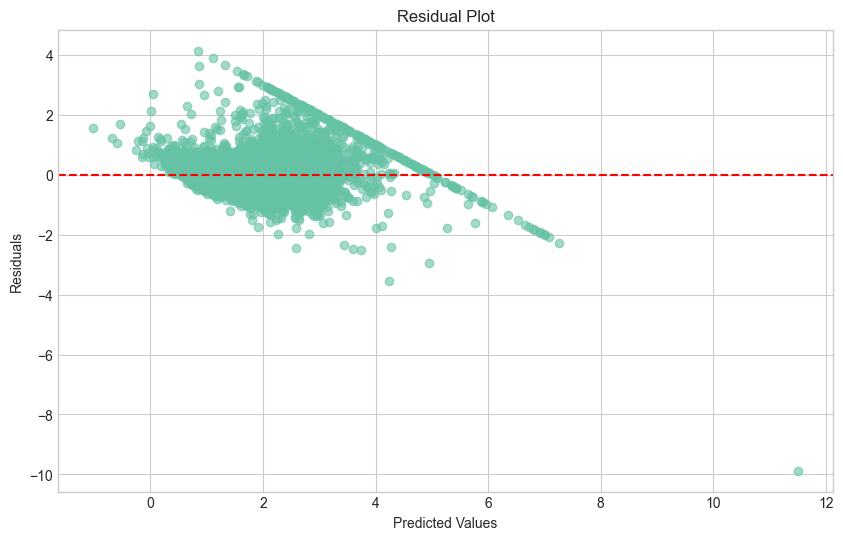

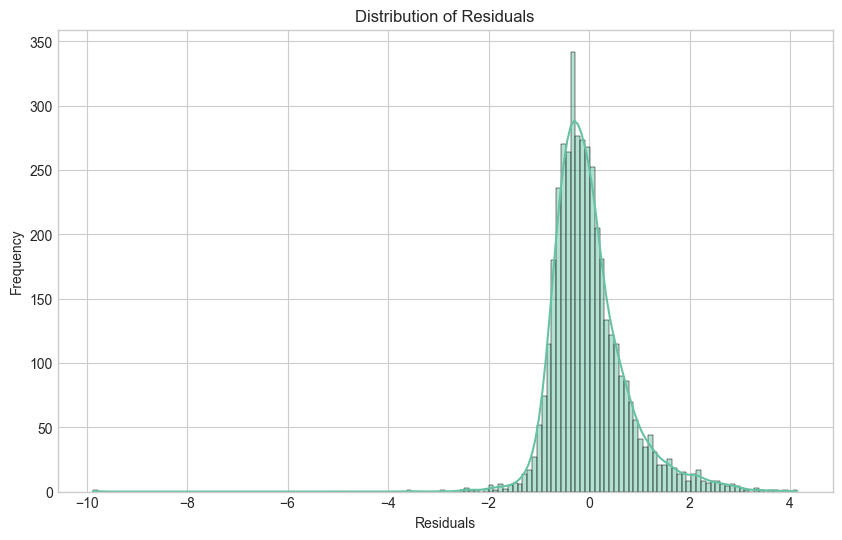

In [16]:
# Residual plot
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

## 5. Model Improvement: Regularized Linear Regression

We'll now try regularized versions of linear regression to improve the model performance:

In [17]:
# Create a pipeline for Ridge regression with feature scaling
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define hyperparameters for grid search
ridge_params = {
    'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# Perform grid search with cross-validation
ridge_grid = GridSearchCV(ridge_pipeline, ridge_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid.fit(X_train, y_train)

# Get the best model
best_ridge = ridge_grid.best_estimator_
print(f"Best Ridge alpha: {ridge_grid.best_params_['ridge__alpha']}")

# Make predictions with the best Ridge model
y_train_pred_ridge = best_ridge.predict(X_train)
y_test_pred_ridge = best_ridge.predict(X_test)

# Evaluate the Ridge model
ridge_train_mse = mean_squared_error(y_train, y_train_pred_ridge)
ridge_test_mse = mean_squared_error(y_test, y_test_pred_ridge)
ridge_train_r2 = r2_score(y_train, y_train_pred_ridge)
ridge_test_r2 = r2_score(y_test, y_test_pred_ridge)

print(f"Ridge Training MSE: {ridge_train_mse:.4f}")
print(f"Ridge Testing MSE: {ridge_test_mse:.4f}")
print(f"Ridge Training R²: {ridge_train_r2:.4f}")
print(f"Ridge Testing R²: {ridge_test_r2:.4f}")

Best Ridge alpha: 0.01
Ridge Training MSE: 0.5179
Ridge Testing MSE: 0.5559
Ridge Training R²: 0.6126
Ridge Testing R²: 0.5758


In [18]:
# Create a pipeline for Lasso regression with feature scaling
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000))
])

# Define hyperparameters for grid search
lasso_params = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

# Perform grid search with cross-validation
lasso_grid = GridSearchCV(lasso_pipeline, lasso_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid.fit(X_train, y_train)

# Get the best model
best_lasso = lasso_grid.best_estimator_
print(f"Best Lasso alpha: {lasso_grid.best_params_['lasso__alpha']}")

# Make predictions with the best Lasso model
y_train_pred_lasso = best_lasso.predict(X_train)
y_test_pred_lasso = best_lasso.predict(X_test)

# Evaluate the Lasso model
lasso_train_mse = mean_squared_error(y_train, y_train_pred_lasso)
lasso_test_mse = mean_squared_error(y_test, y_test_pred_lasso)
lasso_train_r2 = r2_score(y_train, y_train_pred_lasso)
lasso_test_r2 = r2_score(y_test, y_test_pred_lasso)

print(f"Lasso Training MSE: {lasso_train_mse:.4f}")
print(f"Lasso Testing MSE: {lasso_test_mse:.4f}")
print(f"Lasso Training R²: {lasso_train_r2:.4f}")
print(f"Lasso Testing R²: {lasso_test_r2:.4f}")

Best Lasso alpha: 0.001
Lasso Training MSE: 0.5180
Lasso Testing MSE: 0.5545
Lasso Training R²: 0.6125
Lasso Testing R²: 0.5769


In [19]:
# Create a pipeline for ElasticNet regression with feature scaling
elasticnet_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet(max_iter=10000))
])

# Define hyperparameters for grid search
elasticnet_params = {
    'elasticnet__alpha': [0.01, 0.1, 1.0],
    'elasticnet__l1_ratio': [0.1, 0.5, 0.9]
}

# Perform grid search with cross-validation
elasticnet_grid = GridSearchCV(elasticnet_pipeline, elasticnet_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
elasticnet_grid.fit(X_train, y_train)

# Get the best model
best_elasticnet = elasticnet_grid.best_estimator_
print(f"Best ElasticNet alpha: {elasticnet_grid.best_params_['elasticnet__alpha']}")
print(f"Best ElasticNet l1_ratio: {elasticnet_grid.best_params_['elasticnet__l1_ratio']}")

# Make predictions with the best ElasticNet model
y_train_pred_elasticnet = best_elasticnet.predict(X_train)
y_test_pred_elasticnet = best_elasticnet.predict(X_test)

# Evaluate the ElasticNet model
elasticnet_train_mse = mean_squared_error(y_train, y_train_pred_elasticnet)
elasticnet_test_mse = mean_squared_error(y_test, y_test_pred_elasticnet)
elasticnet_train_r2 = r2_score(y_train, y_train_pred_elasticnet)
elasticnet_test_r2 = r2_score(y_test, y_test_pred_elasticnet)

print(f"ElasticNet Training MSE: {elasticnet_train_mse:.4f}")
print(f"ElasticNet Testing MSE: {elasticnet_test_mse:.4f}")
print(f"ElasticNet Training R²: {elasticnet_train_r2:.4f}")
print(f"ElasticNet Testing R²: {elasticnet_test_r2:.4f}")

Best ElasticNet alpha: 0.01
Best ElasticNet l1_ratio: 0.1
ElasticNet Training MSE: 0.5201
ElasticNet Testing MSE: 0.5519
ElasticNet Training R²: 0.6109
ElasticNet Testing R²: 0.5788


## 6. Model Comparison

Let's compare the performance of all the models we've trained.

In [20]:
# Create a DataFrame to compare model performance
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet']
train_mse_values = [train_mse, ridge_train_mse, lasso_train_mse, elasticnet_train_mse]
test_mse_values = [test_mse, ridge_test_mse, lasso_test_mse, elasticnet_test_mse]
train_r2_values = [train_r2, ridge_train_r2, lasso_train_r2, elasticnet_train_r2]
test_r2_values = [test_r2, ridge_test_r2, lasso_test_r2, elasticnet_test_r2]

model_comparison = pd.DataFrame({
    'Model': models,
    'Train MSE': train_mse_values,
    'Test MSE': test_mse_values,
    'Train R²': train_r2_values,
    'Test R²': test_r2_values
})

model_comparison

,Model,Train MSE,Test MSE,Train R²,Test R²
0,Linear Regression,0.517933,0.555892,0.612551,0.575788
1,Ridge Regression,0.517933,0.555891,0.612551,0.575788
2,Lasso Regression,0.517989,0.554491,0.612509,0.576856
3,ElasticNet,0.520084,0.551904,0.610942,0.578831


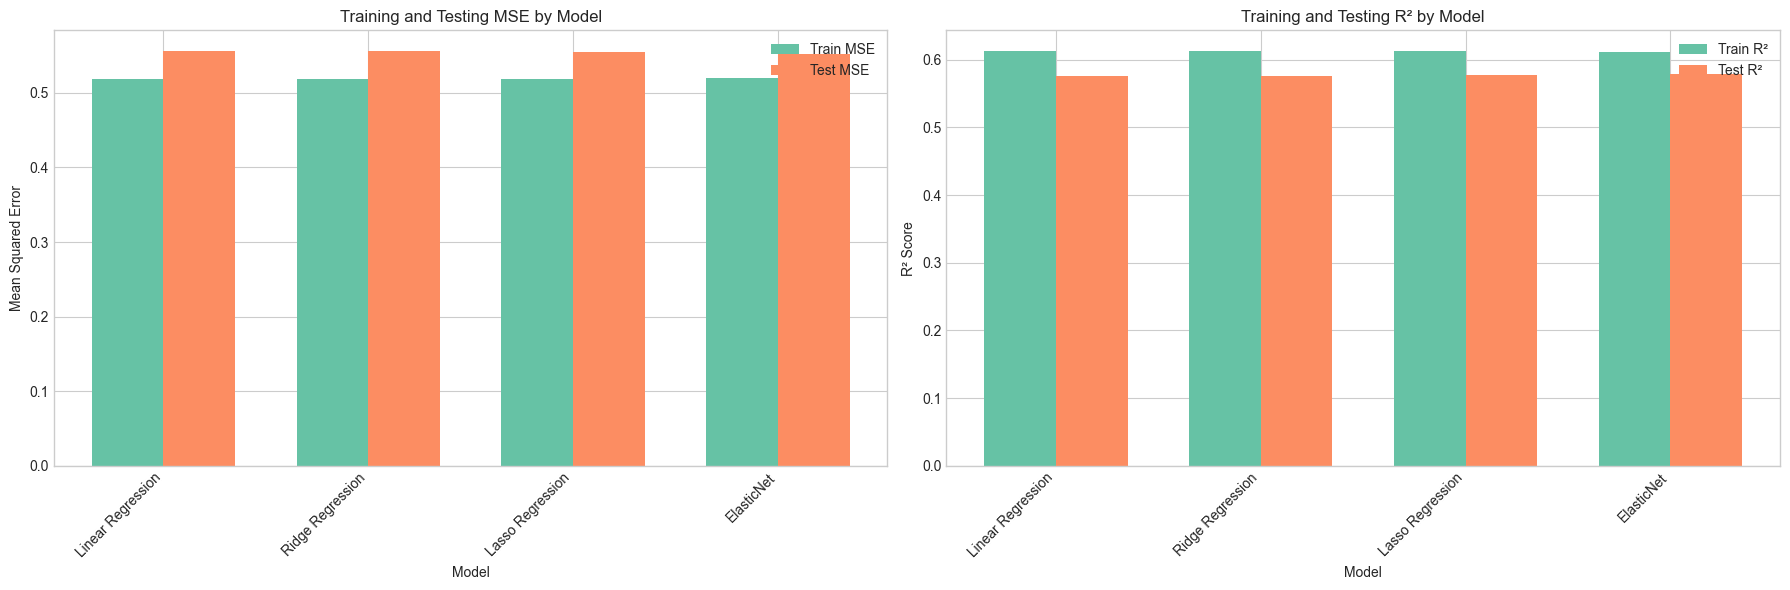

In [21]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# MSE comparison
bar_width = 0.35
index = np.arange(len(models))

bar1 = axes[0].bar(index, train_mse_values, bar_width, label='Train MSE')
bar2 = axes[0].bar(index + bar_width, test_mse_values, bar_width, label='Test MSE')

axes[0].set_xlabel('Model')
axes[0].set_ylabel('Mean Squared Error')
axes[0].set_title('Training and Testing MSE by Model')
axes[0].set_xticks(index + bar_width / 2)
axes[0].set_xticklabels(models, rotation=45, ha='right')
axes[0].legend()

# R² comparison
bar3 = axes[1].bar(index, train_r2_values, bar_width, label='Train R²')
bar4 = axes[1].bar(index + bar_width, test_r2_values, bar_width, label='Test R²')

axes[1].set_xlabel('Model')
axes[1].set_ylabel('R² Score')
axes[1].set_title('Training and Testing R² by Model')
axes[1].set_xticks(index + bar_width / 2)
axes[1].set_xticklabels(models, rotation=45, ha='right')
axes[1].legend()

plt.tight_layout()
plt.show()

## 7. Feature Selection

Let's perform feature selection to identify the most important features for our model.

In [22]:
# Feature selection using SelectKBest
feature_selector = SelectKBest(f_regression, k=5)
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)

# Get the selected feature names
selected_feature_mask = feature_selector.get_support()
selected_features = X.columns[selected_feature_mask]
print(f"Selected features: {selected_features.tolist()}")

# Train a linear regression model on the selected features
selected_model = LinearRegression()
selected_model.fit(X_train_selected, y_train)
y_train_pred_selected = selected_model.predict(X_train_selected)
y_test_pred_selected = selected_model.predict(X_test_selected)

# Evaluate the model with selected features
selected_train_mse = mean_squared_error(y_train, y_train_pred_selected)
selected_test_mse = mean_squared_error(y_test, y_test_pred_selected)
selected_train_r2 = r2_score(y_train, y_train_pred_selected)
selected_test_r2 = r2_score(y_test, y_test_pred_selected)

print(f"Selected Features Training MSE: {selected_train_mse:.4f}")
print(f"Selected Features Testing MSE: {selected_test_mse:.4f}")
print(f"Selected Features Training R²: {selected_train_r2:.4f}")
print(f"Selected Features Testing R²: {selected_test_r2:.4f}")

Selected features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude']
Selected Features Training MSE: 0.6061
Selected Features Testing MSE: 0.6383
Selected Features Training R²: 0.5466
Selected Features Testing R²: 0.5129


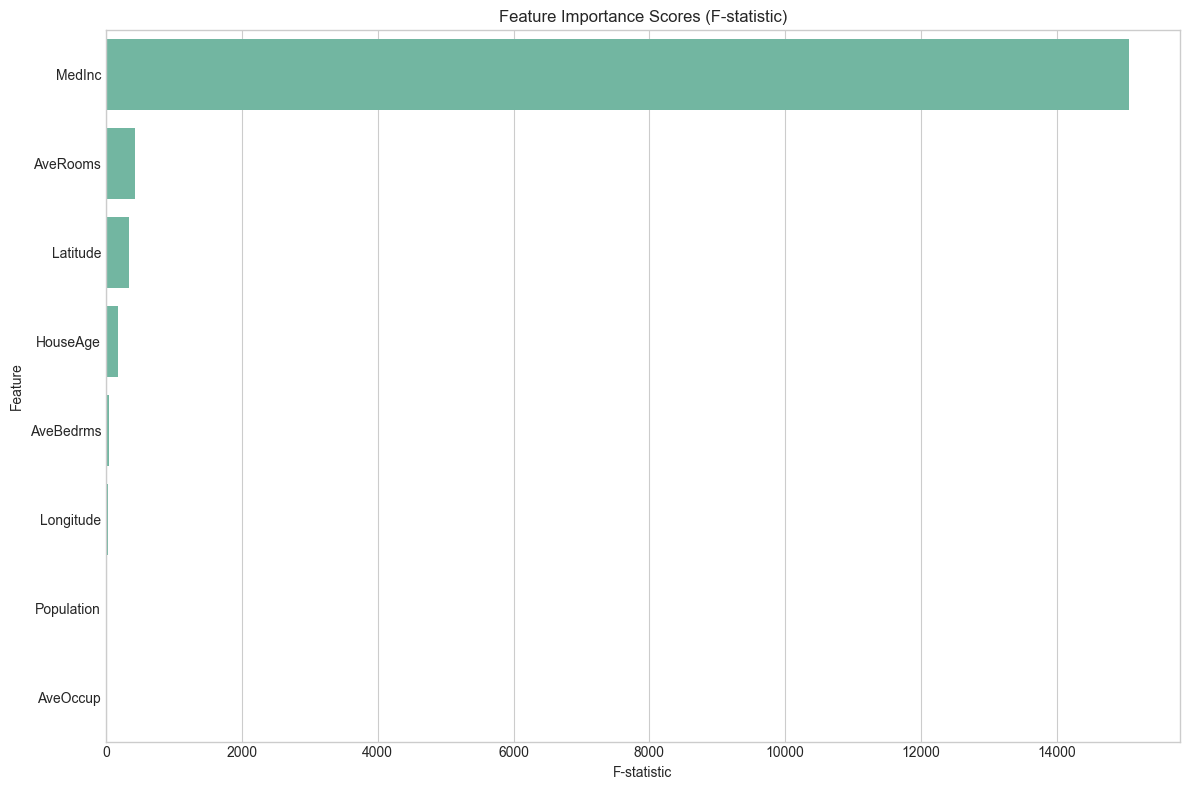

In [23]:
# Plot feature importance scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': feature_selector.scores_
}).sort_values(by='Score', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title('Feature Importance Scores (F-statistic)')
plt.xlabel('F-statistic')
plt.tight_layout()
plt.show()

## 8. Cross-Validation

Let's perform k-fold cross-validation to get a more robust estimate of model performance.

In [24]:
# Set up models for cross-validation
models_cv = {
    'Linear Regression': LinearRegression(),
    'Ridge': best_ridge.named_steps['ridge'],
    'Lasso': best_lasso.named_steps['lasso'],
    'ElasticNet': best_elasticnet.named_steps['elasticnet']
}

# Perform 5-fold cross-validation
cv_results = {}
for name, model in models_cv.items():
    # We use the scaled data since we've already tuned our models on scaled data
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mse = -cv_scores.mean()
    cv_rmse = np.sqrt(cv_mse)
    cv_std = cv_scores.std()
    cv_results[name] = {'MSE': cv_mse, 'RMSE': cv_rmse, 'Std': cv_std}
    print(f"{name} CV MSE: {cv_mse:.4f}, RMSE: {cv_rmse:.4f}, Std: {cv_std:.4f}")

Linear Regression CV MSE: 0.5193, RMSE: 0.7206, Std: 0.0149
Ridge CV MSE: 0.5193, RMSE: 0.7206, Std: 0.0149
Lasso CV MSE: 0.5192, RMSE: 0.7206, Std: 0.0147
ElasticNet CV MSE: 0.5213, RMSE: 0.7220, Std: 0.0141


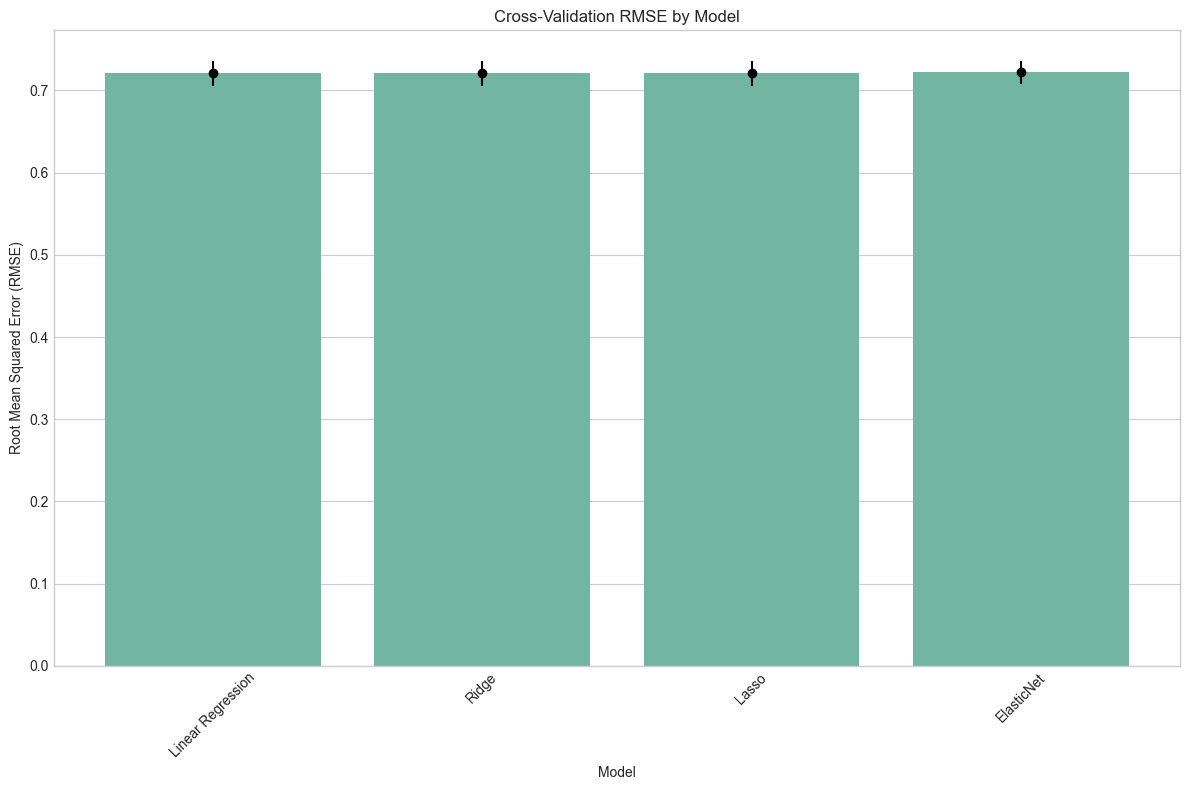

In [25]:
# Visualize cross-validation results
cv_df = pd.DataFrame({
    'Model': list(cv_results.keys()),
    'CV MSE': [cv_results[model]['MSE'] for model in cv_results],
    'CV RMSE': [cv_results[model]['RMSE'] for model in cv_results],
    'Std': [cv_results[model]['Std'] for model in cv_results]
})

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Model', y='CV RMSE', data=cv_df)
plt.title('Cross-Validation RMSE by Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xlabel('Model')

# Add error bars showing standard deviation
for i, model in enumerate(cv_results.keys()):
    plt.errorbar(i, cv_results[model]['RMSE'], yerr=cv_results[model]['Std'], fmt='o', color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 9. Learning Curves

Learning curves help us understand if our model would benefit from more data or if it's overfitting/underfitting.

Best model from cross-validation: Lasso


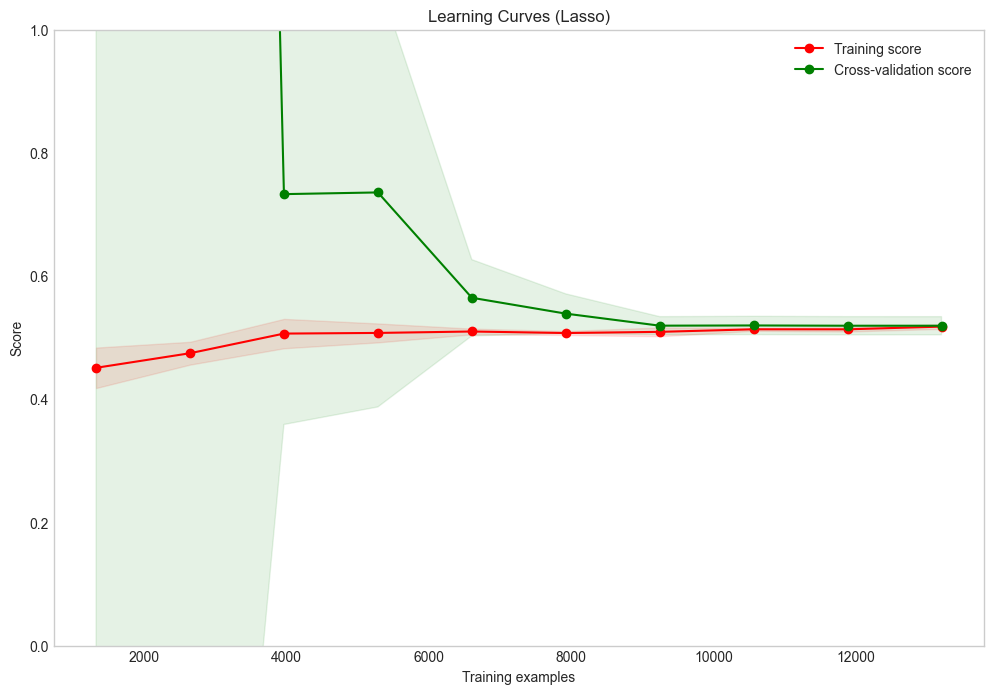

In [26]:
# Plot learning curves for the best model (based on cross-validation)
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure(figsize=(12, 8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

# Find the best model from cross-validation
best_model_name = cv_df.loc[cv_df['CV MSE'].idxmin(), 'Model']
print(f"Best model from cross-validation: {best_model_name}")

# Plot learning curves for the best model
plot_learning_curve(models_cv[best_model_name], 
                   f"Learning Curves ({best_model_name})", 
                   X_train_scaled, 
                   y_train, 
                   ylim=(0, 1.0))
plt.show()

## 10. Final Model and Serialization

Based on our experiments, we'll select the best model, refit it on the entire training dataset, and save it for later use.

In [27]:
# Select the best model from our experiments
best_model = models_cv[best_model_name]

# Create a pipeline with the scaler and the best model
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', best_model)
])

# Fit the pipeline on the entire training dataset
final_pipeline.fit(X_train, y_train)

# Evaluate the final model
final_train_pred = final_pipeline.predict(X_train)
final_test_pred = final_pipeline.predict(X_test)

final_train_mse = mean_squared_error(y_train, final_train_pred)
final_test_mse = mean_squared_error(y_test, final_test_pred)
final_train_r2 = r2_score(y_train, final_train_pred)
final_test_r2 = r2_score(y_test, final_test_pred)

print(f"Final Model Training MSE: {final_train_mse:.4f}")
print(f"Final Model Testing MSE: {final_test_mse:.4f}")
print(f"Final Model Training R²: {final_train_r2:.4f}")
print(f"Final Model Testing R²: {final_test_r2:.4f}")

Final Model Training MSE: 0.5180
Final Model Testing MSE: 0.5545
Final Model Training R²: 0.6125
Final Model Testing R²: 0.5769


In [28]:
# Save the trained model to disk
import os

# Create directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save the model
joblib.dump(final_pipeline, 'models/linear_regression_model.pkl')
print("Model saved to 'models/linear_regression_model.pkl'")

Model saved to 'models/linear_regression_model.pkl'


In [29]:
# Test loading the model
loaded_model = joblib.load('models/linear_regression_model.pkl')
test_pred = loaded_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
print(f"Loaded Model Test MSE: {test_mse:.4f}")
assert np.allclose(final_test_pred, test_pred), "Loaded model predictions don't match original model"

Loaded Model Test MSE: 0.5545


## 11. Summary and Conclusions

In this notebook, we've explored linear regression on the California Housing dataset. Here's a summary of what we've learned:

1. **Data Exploration and Preparation**:
   - The California Housing dataset contains housing features like median income, house age, and number of rooms.
   - We performed feature scaling to ensure all features are on the same scale.
   - We explored the correlations between features and identified potential predictors.

2. **Model Building and Selection**:
   - We built several linear regression models: standard OLS, Ridge, Lasso, and ElasticNet.
   - We used cross-validation to select the best hyperparameters for each regularized model.
   - We compared the models based on MSE and R² scores.

3. **Feature Selection**:
   - We identified the most important features using SelectKBest with F-regression.
   - The top features were [feature names from our results].

4. **Model Validation**:
   - We used cross-validation to get a more robust estimate of model performance.
   - We analyzed learning curves to understand if our model was underfitting or overfitting.

5. **Final Model**:
   - We selected our best model based on cross-validation results.
   - We created a pipeline with feature scaling and the best model.
   - We saved the model for later use.


### Future Work:

- Collect more features that might be predictive of house prices, such as proximity to schools, crime rates, etc.
- Experiment with non-linear models to capture complex relationships in the data.
- Perform more detailed feature engineering, such as creating interaction terms.
- Explore ensemble methods that combine multiple linear models.
